In [3]:
import numpy as np
from scipy.stats import norm, expon, chi2, uniform
import matplotlib.pyplot as plt
%matplotlib inline

# Standard distributions sampling
## Ex 1.
Use scipy to take samples from the following distributions:
1. Normal distribution with $\mu$=1 and $\sigma$=4,
2. Exponential distribution with $\lambda = \dfrac{1}{4}$,
3. Chi-squared distribution with 8 degrees of freedom,
4. Uniform distribution with borders [$-2\sqrt{3}, 6\sqrt{3}$].

Compare their theoretical and sample distribution, mean and variance.

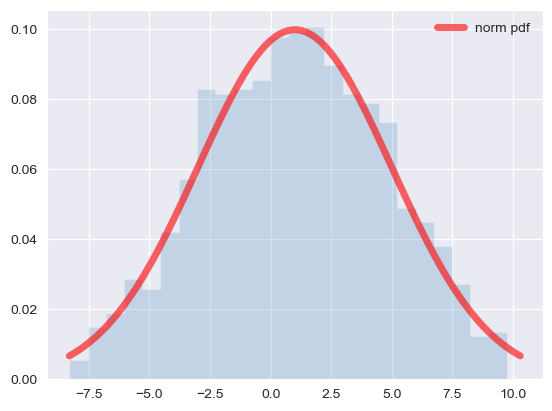

Distribution mean: 1.0
Distribution variance: 16.0
Sample mean: 1.0098958349094123
Sample variance: 15.898836146578283


In [100]:
#1. Normal
#This one I'll do for you :-)

rv_norm = norm(loc = 1, scale = 4)
x = np.linspace(rv_norm.ppf(0.01), rv_norm.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv_norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')
r = rv_norm.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])


ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(rv_norm.stats(moments='m')))
print("Distribution variance: {0}".format(rv_norm.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))

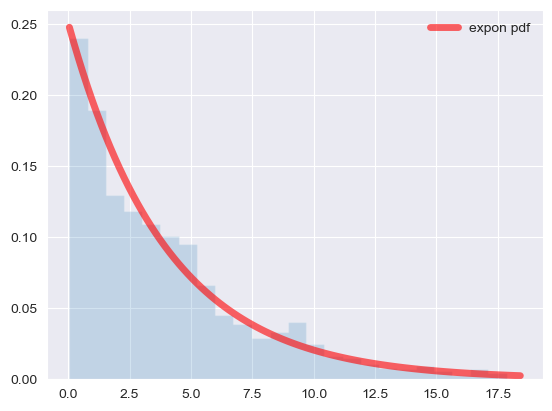

Distribution mean: 4.0
Distribution variance: 16.0
Sample mean: 4.165541136425602
Sample variance: 17.24450126403358


In [84]:
#Exponential
#here goes your code
l = 1/4  # lambda
ex = expon(scale= 1 / l)
x = np.linspace(ex.ppf(0.01), ex.ppf(0.99), 100)  # ppf -> percent point function
fig, ax = plt.subplots(1, 1)
ax.plot(x, ex.pdf(x), 'r-', lw=5, alpha=0.6, label='expon pdf')  # pdf -> probability density function
r = ex.rvs(size=1000)  # rvs -> random variates 
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])

ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(ex.stats(moments='m')))
print("Distribution variance: {0}".format(ex.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))

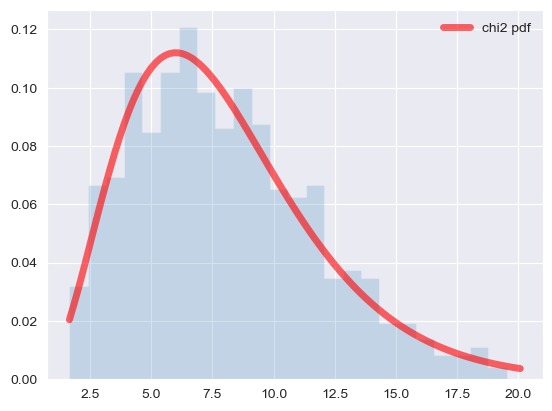

Distribution mean: 8.0
Distribution variance: 16.0
Sample mean: 8.163401939163437
Sample variance: 17.927312248299277


In [86]:
#chi2
#here goes your code
chi = chi2(df=8)
x = np.linspace(chi.ppf(0.01), chi.ppf(0.99), 100)  # ppf -> percent point function
fig, ax = plt.subplots(1, 1)
ax.plot(x, chi.pdf(x), 'r-', lw=5, alpha=0.6, label='chi2 pdf')  # pdf -> probability density function
r = chi.rvs(size=1000)  # rvs -> random variates 
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])

ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(chi.stats(moments='m')))
print("Distribution variance: {0}".format(chi.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))

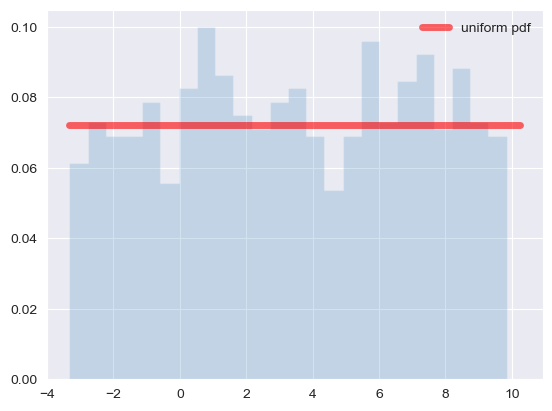

Distribution mean: 3.4641016151377544
Distribution variance: 15.999999999999998
Sample mean: 3.564955374639379
Sample variance: 15.642315590630401


In [63]:
#uniform
uni = uniform(loc=-2* np.sqrt(3), scale=8* np.sqrt(3))  # Uniform is in range [loc, loc + scale]
x = np.linspace(uni.ppf(0.01), uni.ppf(0.99), 100)  # ppf -> percent point function
fig, ax = plt.subplots(1, 1)
ax.plot(x, uni.pdf(x), 'r-', lw=5, alpha=0.6, label='uniform pdf')  # pdf -> probability density function
r = uni.rvs(size=1000)  # rvs -> random variates 
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])

ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(uni.stats(moments='m')))
print("Distribution variance: {0}".format(uni.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))

# Low of large numbers. Central Limit Theorem.
## Ex 2.
a) For N from 2 to 1000 draw N samples from distributions defined in Ex 1. Plot sample variance and mean against the size of the sample. 

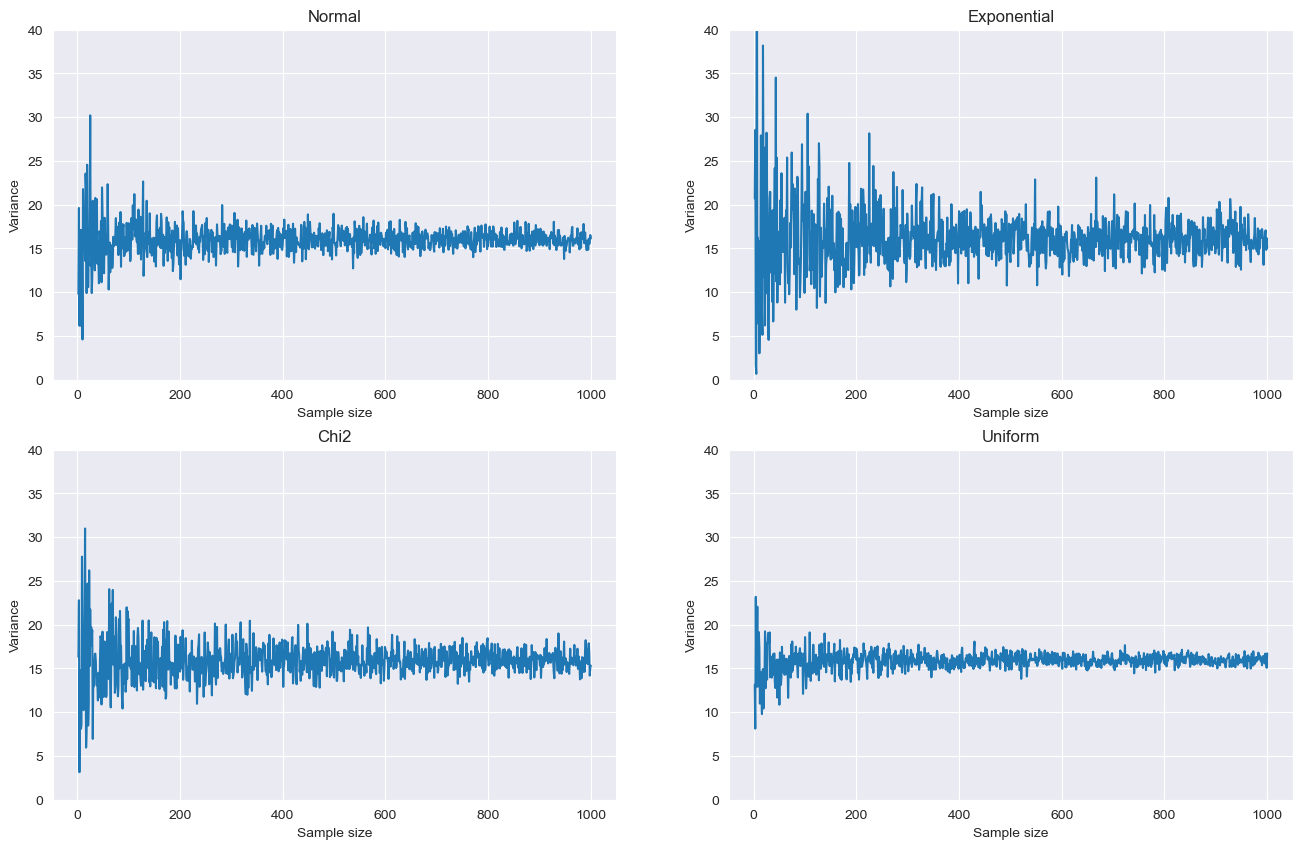

In [64]:
#here goes your code
N = 1000
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

normal_samples = []
expon_samples = []
chi2_samples = []
uniform_samples = []

axs[0, 0].set_title('Normal')
axs[0, 1].set_title('Exponential')
axs[1, 0].set_title('Chi2')
axs[1, 1].set_title('Uniform')

for ax in axs.flatten():
    ax.set_ylim(0, 40)
    ax.set_xlabel('Sample size')
    ax.set_ylabel('Variance')

for i in range(2, N+1):
    normal_samples.append(np.var(rv_norm.rvs(size=i)))
    expon_samples.append(np.var(ex.rvs(size=i)))
    chi2_samples.append(np.var(chi.rvs(size=i)))
    uniform_samples.append(np.var(uni.rvs(size=i)))

x = np.arange(2, N+1)

axs[0, 0].plot(x, normal_samples)
axs[0, 1].plot(x, expon_samples)
axs[1, 0].plot(x, chi2_samples)
axs[1, 1].plot(x, uniform_samples)

plt.show()

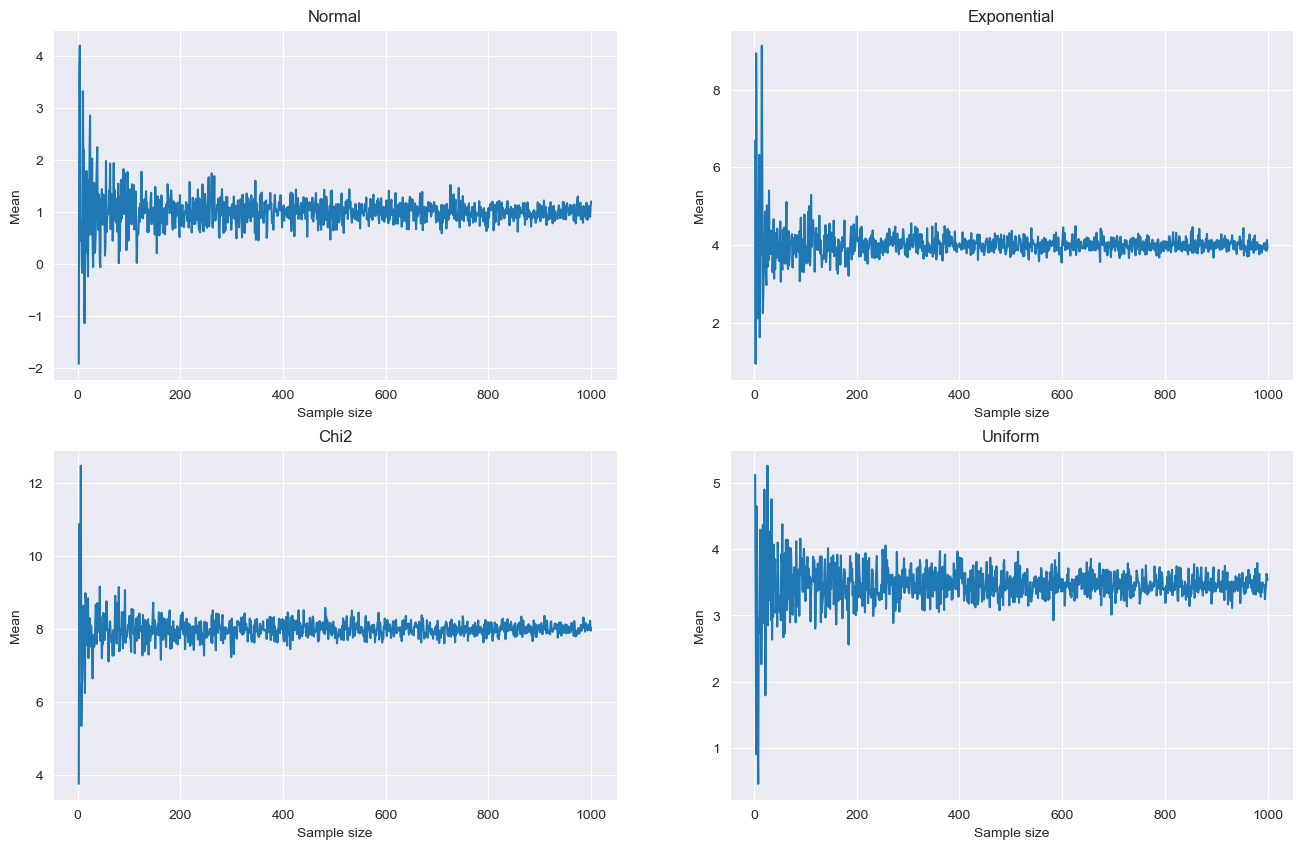

In [65]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

axs[0, 0].set_title('Normal')
axs[0, 1].set_title('Exponential')
axs[1, 0].set_title('Chi2')
axs[1, 1].set_title('Uniform')

normal_samples = []
expon_samples = []
chi2_samples = []
uniform_samples = []

for ax in axs.flatten():
    ax.set_xlabel('Sample size')
    ax.set_ylabel('Mean')

for i in range(2, N+1):
    normal_samples.append(np.mean(rv_norm.rvs(size=i)))
    expon_samples.append(np.mean(ex.rvs(size=i)))
    chi2_samples.append(np.mean(chi.rvs(size=i)))
    uniform_samples.append(np.mean(uni.rvs(size=i)))

x = np.arange(2, N+1)

axs[0, 0].plot(x, normal_samples)
axs[0, 1].plot(x, expon_samples)
axs[1, 0].plot(x, chi2_samples)
axs[1, 1].plot(x, uniform_samples)

plt.show()

## Ex 3.
For N=1,4,9,16 draw histograms of an average over N samples taken from distributions defined in Ex 1. 

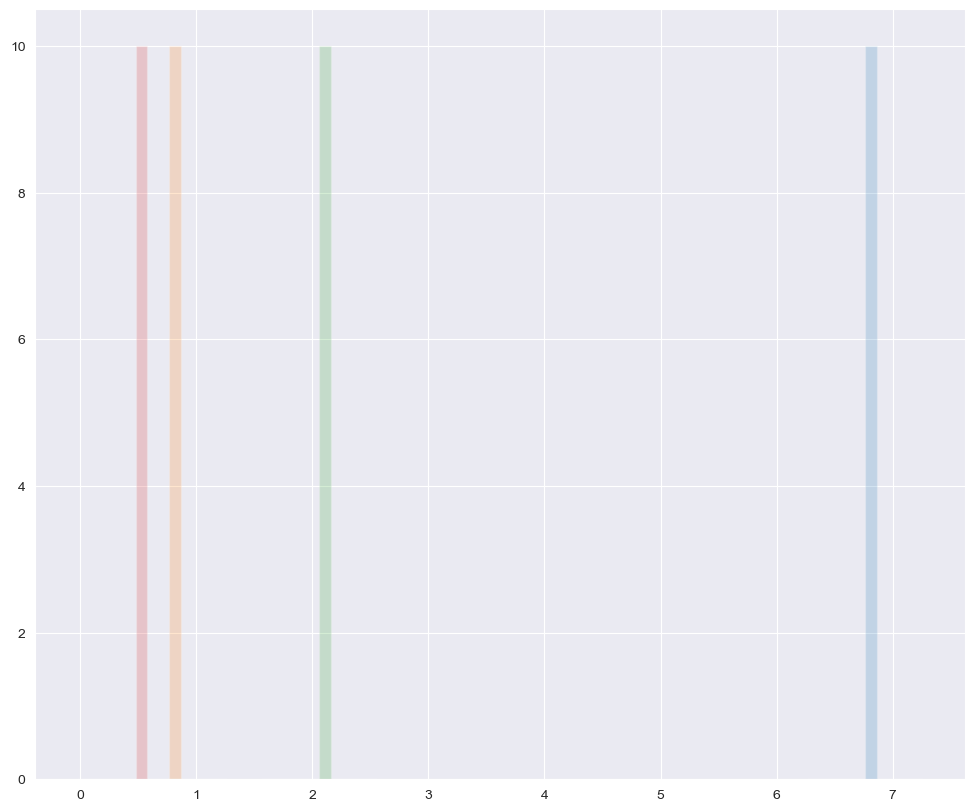

In [102]:
#here goes your code
%matplotlib inline
N = [1, 4, 9, 16]

fig, axs = plt.subplots(1, 1, figsize=(12, 10))


for i in N:
    means = np.mean(rv_norm.rvs(i))
    axs.hist(means, density=True, histtype='stepfilled', 
            alpha=0.2)
    

plt.show()


# Arbitrary distribution sampling

Sometimes it may happen, that we need to sample from a custom distribution, not implemented in any standard library. There exist a simple algorithm for such sampling, provided that the distribution is bounded (pdf has finite support and maximum).


#### Accept-rejection sampling
Let the distribution be given by the pdf $g(x)$ and defined at interval $[a,b]$. In addition, let $M$ be the supremum of $g(x)$.

1. Take a sample $t$ from the uniform distribution at the interval $[a,b]$,
2. Take a sample $u$ from the uniform distribution at the interval $[0,M]$,
3. If $g(t) > u$ we accept $t$ as a sample taken from the original distribution. If not, we go back to 1.

## Ex 4. 
Implement function accept_rejection_sampling(dist, size = 1) which samples from any bounded distribution on the [0,1] interval.

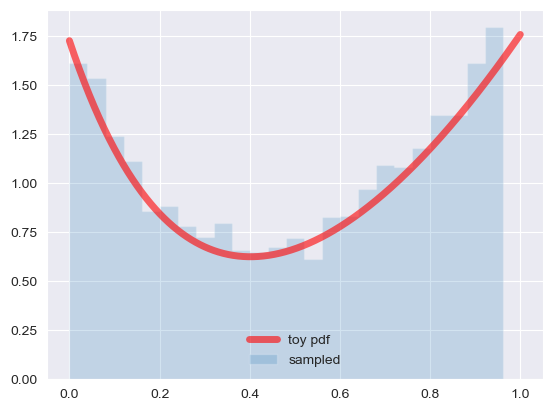

In [67]:
def toy_dist(x):
    C = 1/3 - np.exp(-4)/4 + 1/4
    return (x**2 + np.exp(-4*x)) / C 

x = np.linspace(0,1,1000)

def accept_rejection_sampling(dist, size = 1):
    temp = []
    
    while len(temp) != size:
        t = uniform(loc=0, scale=1).rvs(1)  # unfrom dist [0, 1]
        u = uniform(loc=0, scale=np.max(dist)).rvs(1)  # unifrom dist [0, M]
        
        if toy_dist(t) > u:
            temp.append(t[0])
        else:
            continue
            
    return temp



samples = accept_rejection_sampling(toy_dist(x), size = 10000)
fig, ax = plt.subplots(1, 1)
ax.plot(x, toy_dist(x), 'r-', lw=5, alpha=0.6, label='toy pdf')
ax.hist(samples, density=True, histtype='stepfilled', alpha=0.2, bins = x[::40], label = "sampled")
ax.legend(loc='best', frameon=False)
plt.show()

# Probability space matters!
## Ex 5
Sample 2000 points from the unit disk. Do it in following ways:
1. Assume uniform distribution of radius (0,1) and argument (0,2$\pi$),  
2. Assume uniform distribution of x and y coordinate (-1,1). Drop values laying outside of the disk.   
Explain differences. between 1. and 2. Then:
3. Modify the solution of point 1. by changing the distribution of the radius in such a way, that we result in 2D distribution from 2.

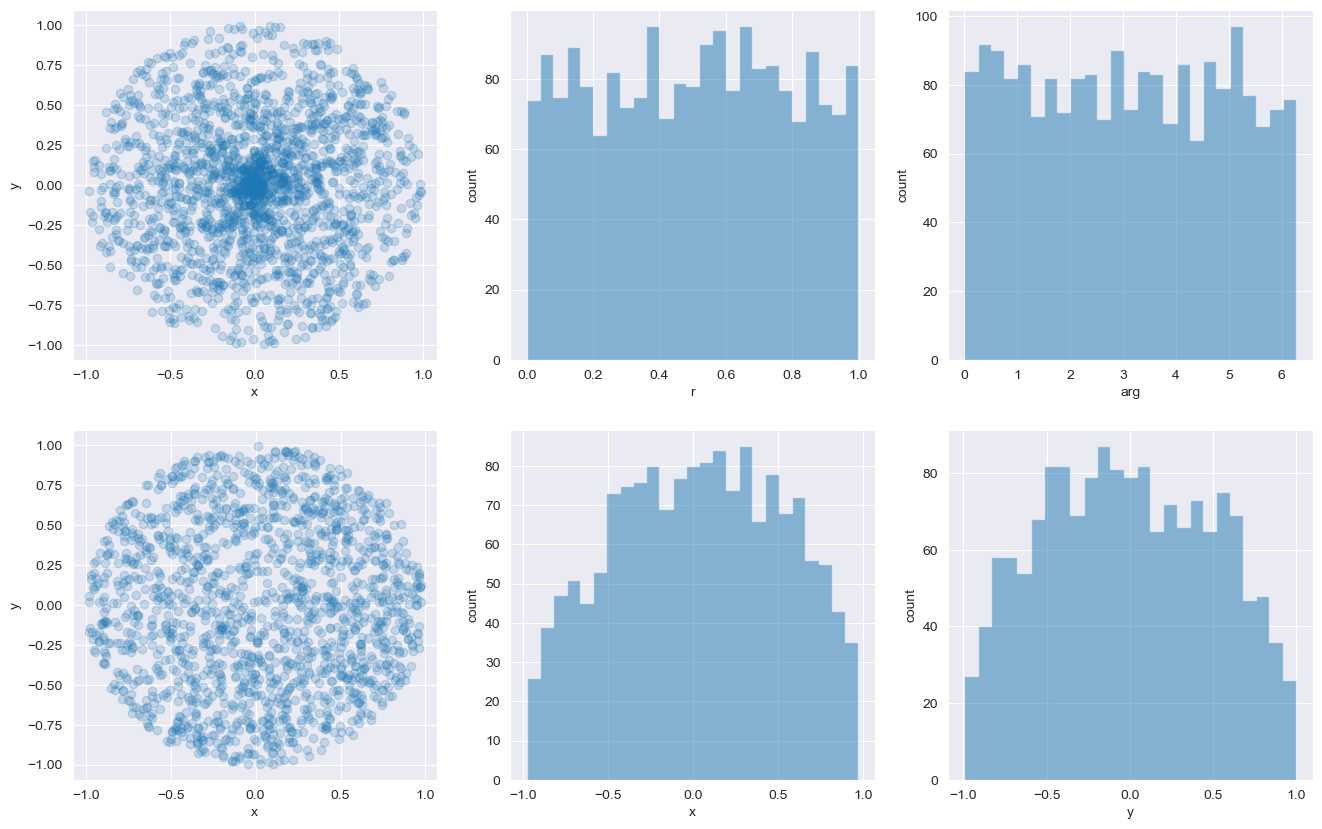

In [77]:
#Version1
N = 2000

fig, axs = plt.subplots(2, 3, figsize=(16, 10) )

r = uniform(loc=0, scale=1).rvs(N)
arg = uniform(loc=0, scale=2 * np.pi).rvs(N)

x = []
y = []


for i in range(N):
    x.append(r[i] * np.cos(arg[i]))
    y.append(r[i] * np.sin(arg[i]))
axs[0, 0].scatter(x, y, lw=1, alpha=0.2)
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('y')

axs[0, 1].hist(r, histtype='stepfilled', alpha=0.5, bins = 25)
axs[0, 1].set_xlabel('r')
axs[0, 1].set_ylabel('count')

axs[0, 2].hist(arg, histtype='stepfilled', alpha=0.5, bins = 25)
axs[0, 2].set_xlabel('arg')
axs[0, 2].set_ylabel('count')

#Version2

x = uniform(loc=-1, scale = 2).rvs(N)
y = uniform(loc=-1, scale =2).rvs(N)

temp_x = []
temp_y = []
for i in range(N):
    if (x[i]**2 + y[i]**2)**(1/2) <= 1:
        temp_x.append(x[i])
        temp_y.append(y[i])

x = temp_x
y = temp_y
axs[1, 0].scatter(x, y, lw=1, alpha=0.2)
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('y')

axs[1, 1].hist(x, histtype='stepfilled', alpha=0.5, bins = 25)
axs[1, 1].set_xlabel('x')
axs[1, 1].set_ylabel('count')

axs[1, 2].hist(y, histtype='stepfilled', alpha=0.5, bins = 25)
axs[1, 2].set_xlabel('y')
axs[1, 2].set_ylabel('count')

plt.show()

Here goes your explanation

If we have an equal chance to generate radius, we will have close number of zero and max values.
However, our circle with tiny radius has a small space possible to distribute them.
The closer we are to the limit of the radius, the more space we have to fill it with points.

That is the reason we see a large group of points close to the center of the circle.

Instead of generating radius and arg if we are generating x and y coordinates, there is a lower chance points will be in the middle,
because we need two random values to be close to zero.

With radius, we need only one random value to be close to zero; argument doesn't make any change.



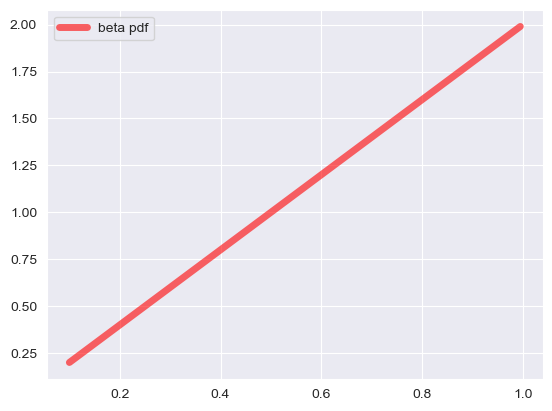

In [138]:
from scipy.stats import beta

b = beta(a=2, b=1)
x = np.linspace(b.ppf(0.01), b.ppf(0.99), 1000)

plt.subplot()
plt.plot(x, b.pdf(x), 'r-', lw=5, alpha=0.6, label='beta pdf')  # pdf -> probability density function

plt.legend()
plt.show()

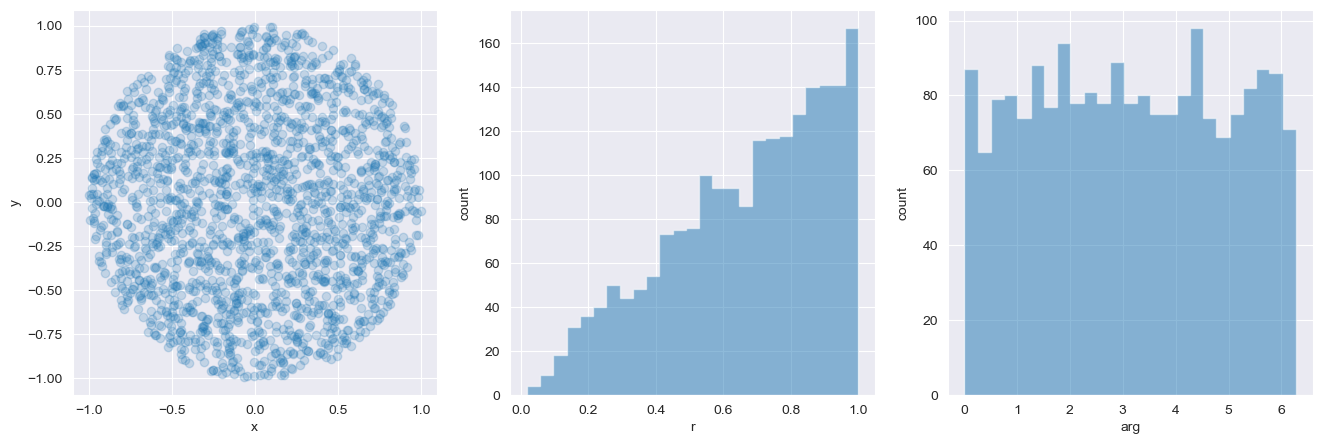

In [139]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5) )

r = beta(a=2, b=1).rvs(N)
arg = uniform(loc=0, scale=2 * np.pi).rvs(N)

x = []
y = []
for i in range(N):
    x.append(r[i] * np.cos(arg[i]))
    y.append(r[i] * np.sin(arg[i]))
    
axs[0].scatter(x, y, lw=1, alpha=0.2)
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

axs[1].hist(r, histtype='stepfilled', alpha=0.5, bins = 25)
axs[1].set_xlabel('r')
axs[1].set_ylabel('count')

axs[2].hist(arg, histtype='stepfilled', alpha=0.5, bins = 25)
axs[2].set_xlabel('arg')
axs[2].set_ylabel('count')

plt.show()

## Application: Laplace equation, Dirichlet boundary conditions

#### Monte-Carlo procedure for solving 2D Laplace equation with Dirichlet boundary conditions
1. Start in a random position inside the boundaries,
2. With an equal probability move up/down/right/left until you hit the boundary,
3. After hitting the boundary we take the value $v_{b}$ of the function in the hitting point. We update the values of all points along the just finished random walk using the formula:
$$ v_{new} = \dfrac{nv_{old} + v_{b}}{n+1}, $$
where $n$ is a number of random walks which have already passed through this point.
4. Finish if the desired precision is achieved. If not, go back to 1.


A theory behind the above procedure can be found here:
https://www.uzh.ch/cmsssl/physik/dam/jcr:d559688c-1e7f-44ca-9fbe-aab0755c0b6e/empp18_MC_Markov.pdf

## Ex 6
Implement the method described above and solve numerically given Dirichlet problem. Plot few intermediate steps.

In [92]:
S = 100 # Decrease if computations take too long
plane = np.zeros((S,S))
plane_counts = np.zeros((S,S))
plane[0] = np.cos(np.linspace(-1.5,1.5,S)*2*np.pi)
plane[-1] = -np.cos(np.linspace(-1,1,S)*2*np.pi)
plane[:,0] = np.cos(np.linspace(-0.5,0.5,S)*2*np.pi)
plane[:,-1] = -2+np.linspace(-1,1,S)**2

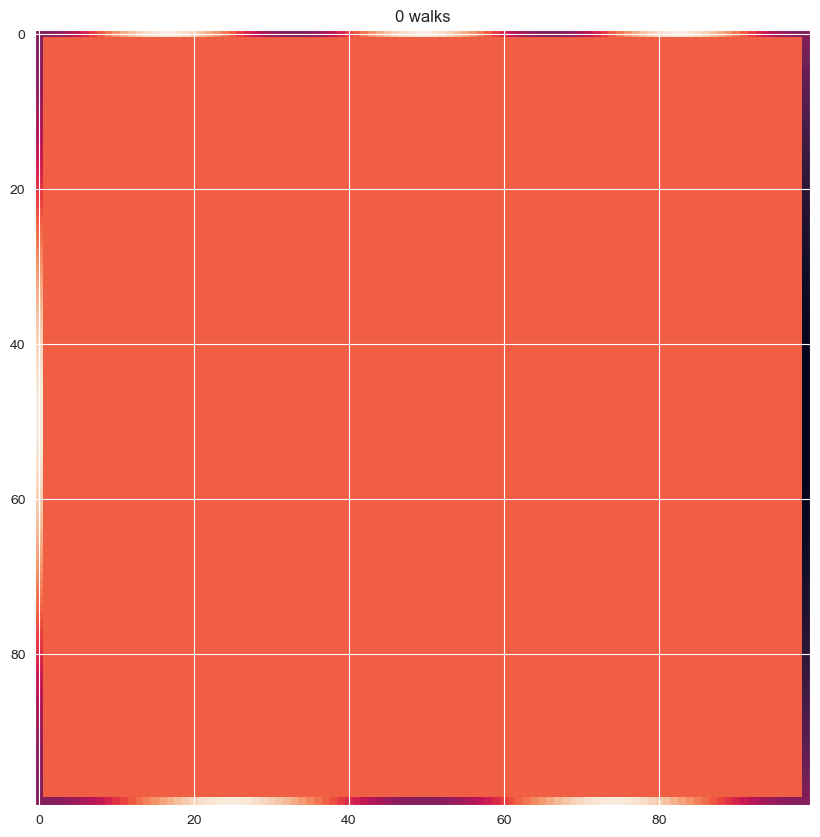

In [94]:
%matplotlib inline

plt.figure(figsize=(10,15))
plt.title("0 walks")
plt.imshow(plane)

In [95]:
directions = ['left', 'right', 'up', 'down']

planes = [plane.copy()]
walks = [0, 5, 38, 110, 316, 913, 2616, 7419, 20553]

for i in range(walks[-1]):
    steps = set()
    x = np.random.randint(0, S-1)
    y = np.random.randint(0, S-1)
    steps.add((x, y))
    if i % 1000 == 0:
        print(f'Iteration -> {i}')
    
    while 0 < x  < S-1 and  0 < y < S-1:
        direction = np.random.choice(directions, p=[0.25, 0.25, 0.25, 0.25])
        
        if direction == 'left':
            y -= 1
        elif direction == 'right':
            y += 1
        elif direction == "up":
            x -= 1
        elif direction =='down':
            x += 1
            
        steps.add((x, y))
    
    for step in steps:
        plane[step[0], step[1]] = (plane_counts[step[0], step[1]] *  plane[step[0], step[1]] + plane[x, y]) / (plane_counts[step[0], step[1]]+1)
        plane_counts[step[0], step[1]] += 1
        
    if i+1 in walks:
        planes.append(plane.copy())
                

Iteration -> 0
Iteration -> 1000
Iteration -> 2000
Iteration -> 3000
Iteration -> 4000
Iteration -> 5000
Iteration -> 6000
Iteration -> 7000
Iteration -> 8000
Iteration -> 9000
Iteration -> 10000
Iteration -> 11000
Iteration -> 12000
Iteration -> 13000
Iteration -> 14000
Iteration -> 15000
Iteration -> 16000
Iteration -> 17000
Iteration -> 18000
Iteration -> 19000
Iteration -> 20000


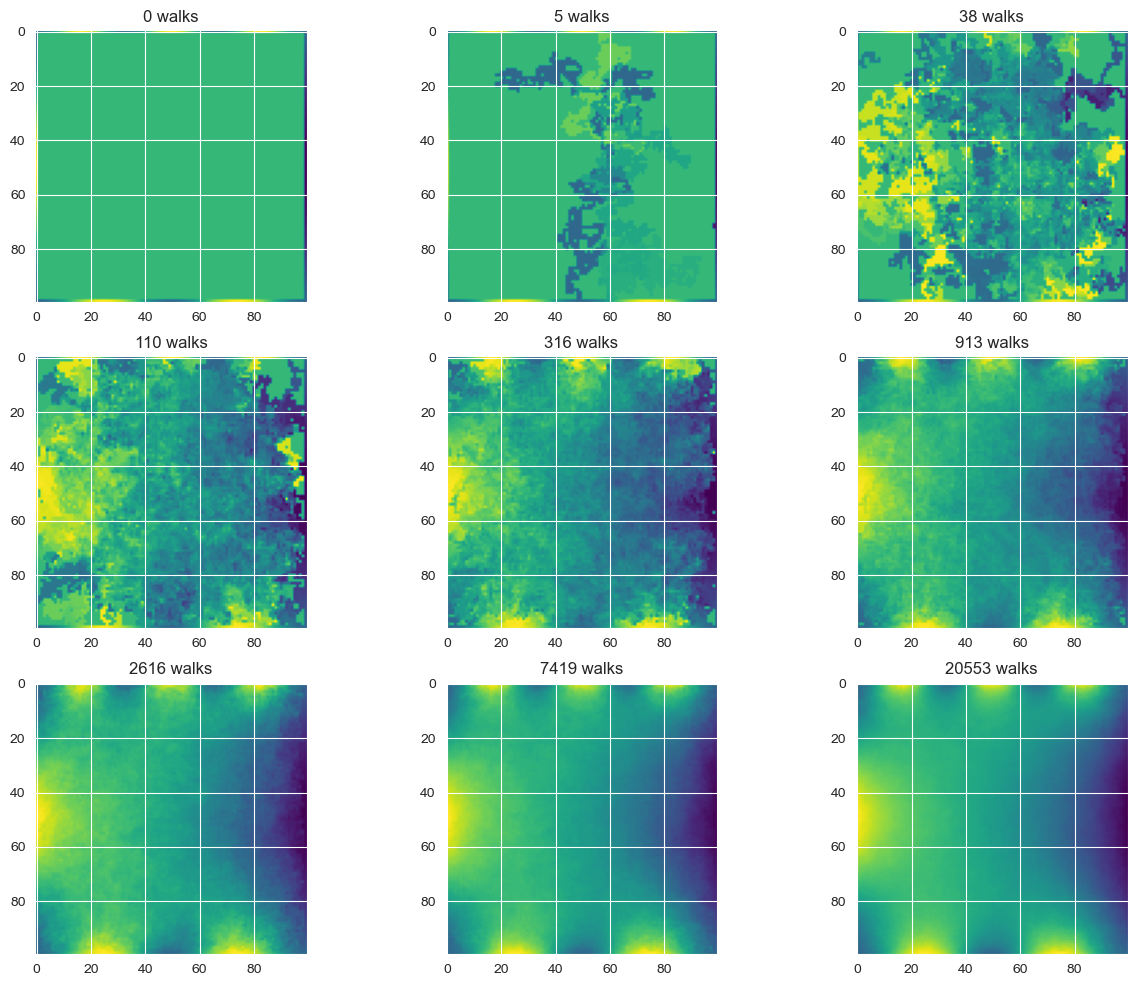

In [96]:
plt.figure(figsize=(15, 12))

for i, walk in enumerate(walks):
    plt.subplot(3, 3, i+1)
    plt.title("{0} walks".format(walks[i]))
    plt.imshow(planes[i], cmap='viridis')

In [97]:
#Animation code for testing purposes. May not work on your machine.


%matplotlib qt

import matplotlib.animation as animation 

fig = plt.figure()
plt.title("0 walks")
im = plt.imshow(planes[0])
im.set_array(planes[0])

# function to update figure
def updatefig(j):
    # set the data in the axesimage object
    im.set_array(planes[j])
    plt.title("{0} walks".format(walks[j]))
    return [im]
# kick off the animation
ani = animation.FuncAnimation(fig, updatefig, repeat=True, frames=len(planes), interval=1000)

ani.save('monte_carlo_laplace.gif')

plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.
